<a href="https://colab.research.google.com/github/Sayeeshruthii/Deep-Learning-Workshop/blob/master/DeepLearningSyntheticdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as skd
from sklearn import preprocessing 
import tensorflow.keras as tfk
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from mlxtend.plotting import plot_decision_regions

#Generating synthetic linear dataset

In [49]:
X,y = skd.make_regression(n_samples=100, n_features=1, n_targets=1, bias=0.5, noise=5.5, random_state=42)

# Visulalizing the synthetic dataset


Visualizing the Synthetic Dataset


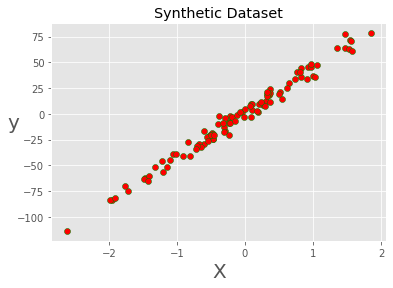

In [51]:
print("\nVisualizing the Synthetic Dataset")
plt.style.use("ggplot")
plt.scatter(X,y,color='red',edgecolors="green")
plt.title("Synthetic Dataset")
plt.xlabel("X", fontsize=20)
plt.ylabel("y",rotation = 0, fontsize = 20)
plt.show()

#reshaping the y values into 2D matrix of 1 column

In [52]:
y = y.reshape(-1,1) #if y is not an array then use, np.asanyarray(y).reshape(-1,1)

Test split 0.3 Model loss = 66
# Test split 02 Model loss = 50
with 100 epoch

In [156]:
#Spliting the dataset into Training and Testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Sequetial model

In [157]:
model = tfk.Sequential([
        tfk.Input(shape = (1,)),            
        tfk.layers.Dense(50, activation='relu'),  #first hidden layer
        tfk.layers.Dense(100, activation='relu'), #second hidden layer
        tfk.layers.Dense(150, activation='relu'), #third hidden layer
        tfk.layers.Dense(200, activation='relu'), #fourth hidden layer
        tfk.layers.Flatten(),
        tfk.layers.Dropout(0.5),
        tfk.layers.Dense(1,activation='linear') #activation linear by default, also can add: activation ='linear' 
        ])

 Optimizer change

In [169]:
model.compile(optimizer=tfk.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [170]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_67 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_68 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_69 (Dense)             (None, 200)               30200     
_________________________________________________________________
flatten_4 (Flatten)          (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 1)               

Increse epoch size

In [178]:
training = model.fit(X_train,y_train, epochs = 75, batch_size =10)
#Testing the models performance 
y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred)
print("Testset Result: \n---------------")
print("MSE: ", mse)

Epoch 1/75
7/7 [==============================] - 0s 3ms/step - loss: 57.8070
Epoch 2/75
7/7 [==============================] - 0s 3ms/step - loss: 31.8092
Epoch 3/75
7/7 [==============================] - 0s 3ms/step - loss: 25.8685
Epoch 4/75
7/7 [==============================] - 0s 3ms/step - loss: 41.8353
Epoch 5/75
7/7 [==============================] - 0s 3ms/step - loss: 47.6329
Epoch 6/75
7/7 [==============================] - 0s 3ms/step - loss: 45.2565
Epoch 7/75
7/7 [==============================] - 0s 2ms/step - loss: 27.5987
Epoch 8/75
7/7 [==============================] - 0s 4ms/step - loss: 43.8207
Epoch 9/75
7/7 [==============================] - 0s 3ms/step - loss: 63.6411
Epoch 10/75
7/7 [==============================] - 0s 3ms/step - loss: 43.0392
Epoch 11/75
7/7 [==============================] - 0s 3ms/step - loss: 45.0632
Epoch 12/75
7/7 [==============================] - 0s 4ms/step - loss: 54.3627
Epoch 13/75
7/7 [==============================] - 0s 3ms/ste

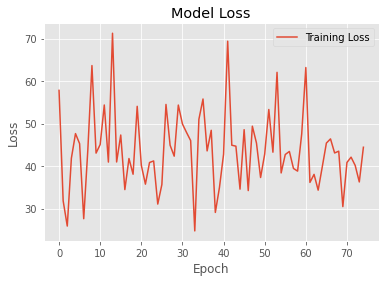

In [179]:
#Visualizing training loss values
plt.plot(training.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [180]:
#Reshapping the matrix into array to pass the value into np.linspace() for 2D visualizaiton. 
x_train_arr = np.asarray(X_train).reshape(-1)
y_train_arr = np.asarray(y_train).reshape(-1)
x_test_arr = np.asarray(X_test).reshape(-1)
y_test_arr = np.asarray(y_test).reshape(-1)
#Creating evenly spaced values for smooth visulatization
xp_train = np.linspace(x_train_arr.min(), x_train_arr.max())
xp_test = np.linspace(x_test_arr.min(), x_test_arr.max())

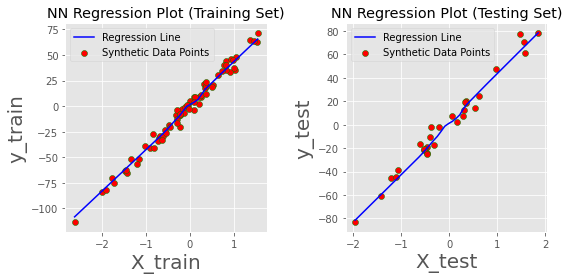

In [181]:
#Visulalizing training and testing plots. 
fig, ax = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter (X_train, y_train, color='red', edgecolors='green', label='Synthetic Data Points')
ax[0].plot(xp_train,model.predict(xp_train.reshape(-1)),color='blue', label='Regression Line')
ax[0].set_title("NN Regression Plot (Training Set)")
ax[0].set_xlabel("X_train", fontsize=20)
ax[0].set_ylabel("y_train", fontsize = 20)
ax[0].legend()
ax[1].scatter(X_test,y_test,color='red', edgecolors='green', label='Synthetic Data Points')
ax[1].plot(xp_test,model.predict(xp_test.reshape(-1)),color='blue',label='Regression Line')
ax[1].set_title("NN Regression Plot (Testing Set)")
ax[1].set_xlabel("X_test", fontsize=20)
ax[1].set_ylabel("y_test", fontsize = 20)
ax[1].legend()
plt.tight_layout()
plt.show()

In [182]:
#Creating Linear Regression Model
lr_model = LinearRegression()
#Training the model
lr_model.fit(X_train,y_train)
#Testing the model's performance
y_pred_lr = lr_model.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred_lr)
print("MSE: ", mse)


MSE:  34.576756151252845


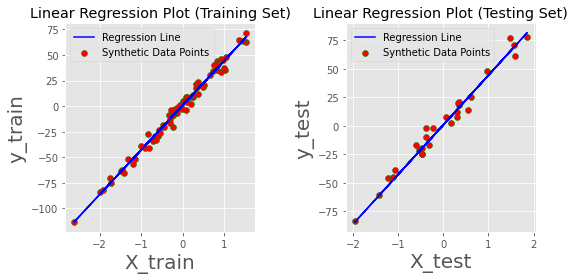

In [183]:
#Visualizing the Training and Testset performance of Linear Regression
fig, ax = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
ax[0].scatter (X_train, y_train, color='red', edgecolors='green', label='Synthetic Data Points')
ax[0].plot(X_train,lr_model.predict(X_train),color='blue', label='Regression Line')
ax[0].set_title("Linear Regression Plot (Training Set)")
ax[0].set_xlabel("X_train", fontsize=20)
ax[0].set_ylabel("y_train", fontsize = 20)
ax[0].legend()
ax[1].scatter(X_test,y_test,color='red', edgecolors='green', label='Synthetic Data Points')
ax[1].plot(X_test,lr_model.predict(X_test),color='blue',label='Regression Line')
ax[1].set_title("Linear Regression Plot (Testing Set)")
ax[1].set_xlabel("X_test", fontsize=20)
ax[1].set_ylabel("y_test", fontsize = 20)
ax[1].legend()
plt.tight_layout()
plt.show()

In [184]:
#Generating synthetic non-linear data to solve classification problem
X,y = skd.make_circles(n_samples=100, shuffle=False, noise=None, random_state=None, factor=0.5)

In [185]:
#Finding and counting unique elements. 
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique class of the dataset:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique class of the dataset:
[[ 0  1]
 [50 50]]


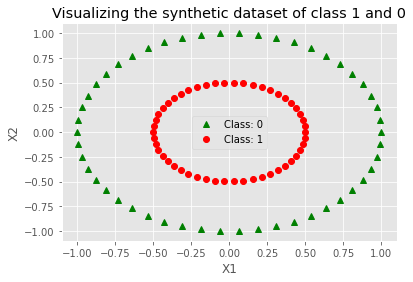

In [186]:
#Visualizing the synthetic dataset of Class 1 and Class -1: 
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^', label='Class: 0')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro' , label="Class: 1")
plt.title("Visualizing the synthetic dataset of class 1 and 0")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()  

In [188]:

#Spliting the dataset into train and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [189]:
print("Frequency of unique class of elements in the test set:")
unique_elements_test, count_elements_test=np.unique(y_test, return_counts=True)
print(unique_elements_test, count_elements_test)

Frequency of unique class of elements in the test set:
[0 1] [15 15]


In [190]:
#Creating validation set  by copying last 10 elements from the training set
X_val = X_train[70:]
y_val = y_train[70:]
#Removing the validation set (last 10 elements) from training set
X_train = X_train[:70]
y_train = y_train[:70]

In [191]:
#Creating the deep learning model (Lets try a differnt apprach, can be used same approach shown earlier) 
model = tfk.Sequential()
model.add(tfk.layers.Dense(50,input_shape=(2,), activation='relu')) #First Hidden Layer
model.add(tfk.layers.Dense(100, activation='relu')) #Second  Hidden Layer
model.add(tfk.layers.Dense(1, activation='softmax')) #Output Layer

In [192]:
# Compiling the model for binary classification # Use loss = categorical_crossentropy for multiclass prediction. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
#Model's Summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_72 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [195]:
#Training the model 
training = model.fit(X_train,y_train, epochs = 50, batch_size =10, validation_data =(X_val,y_val))

Epoch 1/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0121 - accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 0.5000
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.5000
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.5000
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.5000
Epoch 11/50
7/7 [======================

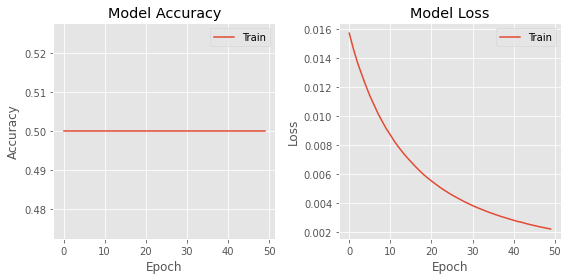

In [199]:
#Visulaizing the Training and Validation Sets Loss and Accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#Plot training and validation accuracy values
#axes[0].set_ylim(0,1) #if we want to limit axis in certain range
axes[0].plot(training.history['accuracy'], label='Train')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#Plot training and validation loss values
#axes[1].set_ylim(0,1)
axes[1].plot(training.history['loss'], label='Train')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
plt.tight_layout()
plt.show()

In [200]:
# Evaluating the performance on the Test set 
test_loss_accuracy = model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0029 - accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


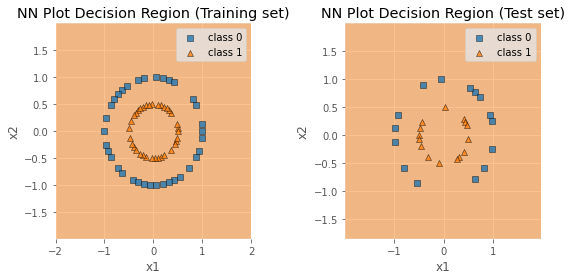

In [201]:
# Visualising the Training and Test set plot decision area
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=model, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=model, ax=axes[1], legend=0)
axes[0].set_title('NN Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('NN Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')

handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

plt.tight_layout()
plt.show()


In [202]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Converting the predicted result into desired class level
# Singmoid produce the output between 0 and 1. Therefore, the decision boundary for sigmoid is 0.5
for i in range(0, len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [203]:
# Generating confusion matrics, details classification report
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Neural Network Model:\n ",cm)
print( "{0}".format(metrics.classification_report(y_test,y_pred)))
# Generating accuracy in %, 
# Similary precision_score and recall_score can be used to generate precision and recall seperately
accuracy_test = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy:%.2f' % accuracy_test,"%")

Confusion Matrix for Neural Network Model:
  [[ 0 15]
 [ 0 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Accuracy:50.00 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
# Using non-linear svm calssifier , use kernel=linear for linear classifier. 
from sklearn import svm
classifier = svm.SVC(kernel='rbf') #rbf = 'radial basis function' for non-linear classification
classifier.fit(X_train,y_train)

# Predicting Teset set result
y_pred = classifier.predict(X_test)

In [206]:
# Generating confusion matrics, details classification report
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix for SVM Clssifer:\n ",cm)
print( "{0}".format(metrics.classification_report(y_test,y_pred)))
# Generating accuracy in %, 
# Similary precision_score and recall_score can be used to generate precision and recall seperately
accuracy_test = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy:%.2f' % accuracy_test,"%")

Confusion Matrix for SVM Clssifer:
  [[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:100.00 %


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


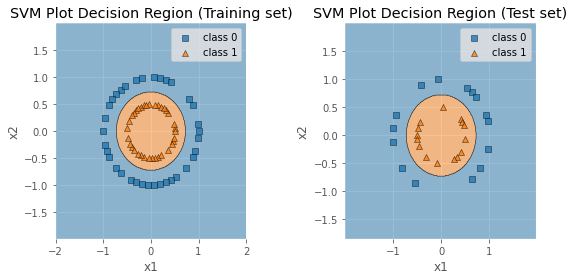

In [207]:
# Visualising the Training and Test set plot decision area
fig, axes = plt.subplots (nrows=1, ncols=2, figsize=(8, 4))
fig1 = plot_decision_regions(X_train, y_train, clf=classifier, ax=axes[0], legend=0)
fig2 = plot_decision_regions(X_test, y_test, clf=classifier, ax=axes[1], legend=0)
axes[0].set_title('SVM Plot Decision Region (Training set)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[1].set_title('SVM Plot Decision Region (Test set)')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
handles, labels = fig1.get_legend_handles_labels()
fig1.legend(handles, 
          ['class 0', 'class 1'])
fig2.legend(handles, 
          ['class 0', 'class 1'])

plt.tight_layout()
plt.show()